# Part 2: Outlier removal using percentiles and z score

Examine price_per_sqft column in housing_data.csv and do following,

(1) Removing outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles

(2) After removing outliers in step 1, you get a new dataframe.

(3) On step(2) dataframe, use 4 standard deviation to remove outliers

(4) Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram

(5) On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result

In [121]:
import pandas as pd
import seaborn as sn
from matplotlib import pyplot as plt


In [122]:
df = pd.read_csv("housing_data.csv")
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [123]:
df.shape

(13200, 7)

In [124]:
df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

<AxesSubplot:xlabel='price_per_sqft', ylabel='Count'>

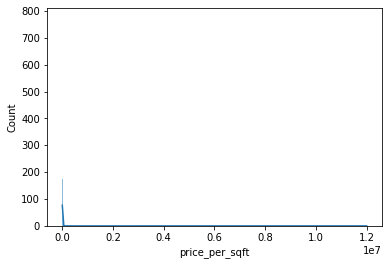

In [125]:
sn.histplot(df.price_per_sqft,kde="true")

Text(0, 0.5, 'Count')

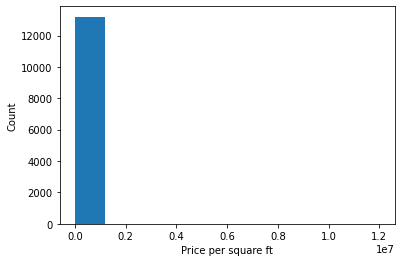

In [126]:
plt.hist(df.price_per_sqft, histtype='bar')
plt.xlabel('Price per square ft')
plt.ylabel('Count')


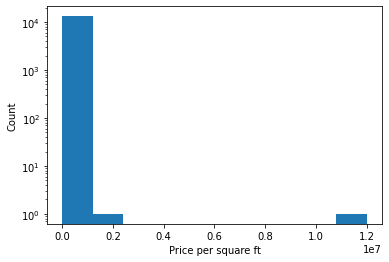

In [127]:
plt.hist(df.price_per_sqft,histtype='bar')
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.yscale('log')


In [128]:
lower_limit, upper_limit = df.price_per_sqft.quantile([0.001, 0.999])
lower_limit, upper_limit

(1366.184, 50959.36200000098)

In [129]:
outliers = df[(df.price_per_sqft>upper_limit) | (df.price_per_sqft<lower_limit)]
outliers.head()
# outliers detected

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371
798,other,4 Bedroom,10961.0,4.0,80.0,4,729
1005,other,1 BHK,15.0,1.0,30.0,1,200000
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000


In [130]:
df_no_anomaly = df[(df.price_per_sqft<upper_limit) & (df.price_per_sqft>lower_limit)]
df_no_anomaly.shape
# Removing outliers

(13172, 7)

In [131]:
df_no_anomaly.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


Text(0, 0.5, 'Count')

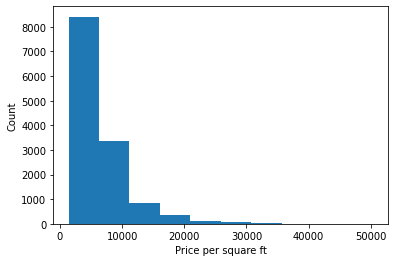

In [132]:
plt.hist(df_no_anomaly.price_per_sqft, histtype='bar')
plt.xlabel('Price per square ft')
plt.ylabel('Count')

In [133]:
num_of_anomalies_removed = df.shape[0] - df_no_anomaly.shape[0]
print(num_of_anomalies_removed)
# Number of outliers removed

28


### Remove outliers using Standard Deviation

In [134]:
end = df_no_anomaly.price_per_sqft.mean() + 4*df_no_anomaly.price_per_sqft.std()
beg = df_no_anomaly.price_per_sqft.mean() - 4*df_no_anomaly.price_per_sqft.std()
print("Beginning is : " + str(beg) + " and ending is : " + str(end))

Beginning is : -9900.429065502582 and ending is : 23227.73653589432


In [135]:
outliers_std = df_no_anomaly[(df_no_anomaly.price_per_sqft>end) | (df_no_anomaly.price_per_sqft<beg)]
outliers_std.shape

(125, 7)

In [136]:
outliers_std.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083
733,Cunningham Road,4 BHK,5270.0,4.0,1250.0,4,23719
760,other,9 Bedroom,600.0,9.0,190.0,9,31666


In [137]:
df_no_anomaly.shape

(13172, 7)

In [138]:
df_no_anomaly_std = df_no_anomaly[(df_no_anomaly.price_per_sqft<end) & (df_no_anomaly.price_per_sqft>beg)]
df_no_anomaly_std.shape

(13047, 7)

Text(0.5, 0, 'Price per sqft')

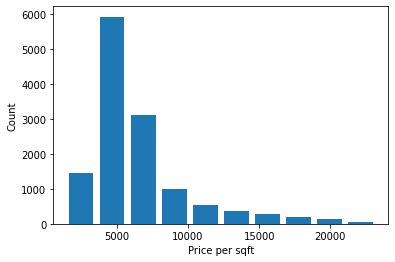

In [139]:
plt.hist(df_no_anomaly_std.price_per_sqft,rwidth=0.8,histtype='bar')
plt.ylabel("Count")
plt.xlabel("Price per sqft")

In [140]:
num_of_anomalies_removed2 = df_no_anomaly.shape[0]-df_no_anomaly_std.shape[0]
print(num_of_anomalies_removed2)
# Number of outliers removed

125


<AxesSubplot:xlabel='price_per_sqft', ylabel='Count'>

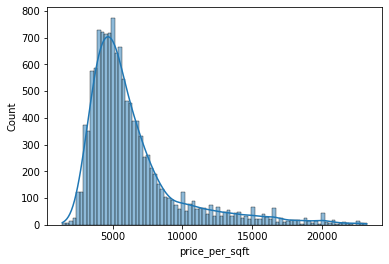

In [141]:
sn.histplot(df_no_anomaly_std.price_per_sqft,kde="true")

### Remove outliers using z score.

In [142]:
df_no_anomaly.price_per_sqft.describe()

count    13172.000000
mean      6663.653735
std       4141.020700
min       1379.000000
25%       4271.000000
50%       5438.000000
75%       7311.000000
max      50349.000000
Name: price_per_sqft, dtype: float64

In [143]:
mean = df_no_anomaly.price_per_sqft.mean()
print(mean)

6663.6537351958705


In [144]:
std = df_no_anomaly.price_per_sqft.std()
print(std)

4141.020700174613


In [145]:
df_no_anomaly['zscore'] = (df_no_anomaly.price_per_sqft-mean)/std
df_no_anomaly.shape

C:\Users\MYPC~1\AppData\Local\Temp/ipykernel_11244/1155269791.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_anomaly['zscore'] = (df_no_anomaly.price_per_sqft-mean)/std


(13172, 8)

In [146]:
df_no_anomaly.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864


In [147]:
outliers_z = df_no_anomaly[(df_no_anomaly.zscore < -4) | (df_no_anomaly.zscore>4)]
outliers_z.shape
#outliers detected

(125, 8)

In [148]:
df_no_anomaly_zscore= df_no_anomaly[(df_no_anomaly.zscore>-4)&(df_no_anomaly.zscore<4)]
df_no_anomaly_zscore.shape
#outliers removed

(13047, 8)

In [149]:
df_no_anomaly.shape[0] - df_no_anomaly_zscore.shape[0]
#number of outliers removed

125